In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 필수과제2

- 1. mpg데이터 제조사별 cty, hwy 막대그래프 그리기

In [3]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
hwy = mpg.groupby('manufacturer').agg(mean_hwy = ('hwy','median'))
cty = mpg.groupby('manufacturer').agg(mean_cty = ('cty','median'))
result = pd.merge(hwy, cty, on='manufacturer')
result = result.reset_index()
result

,manufacturer,mean_hwy,mean_cty
0,audi,26.0,17.5
1,chevrolet,23.0,15.0
2,dodge,17.0,13.0
3,ford,18.0,14.0
4,honda,32.0,24.0
5,hyundai,26.5,18.5
6,jeep,18.5,14.0
7,land rover,16.5,11.5
8,lincoln,17.0,11.0
9,mercury,18.0,13.0


<Axes: xlabel='manufacturer'>

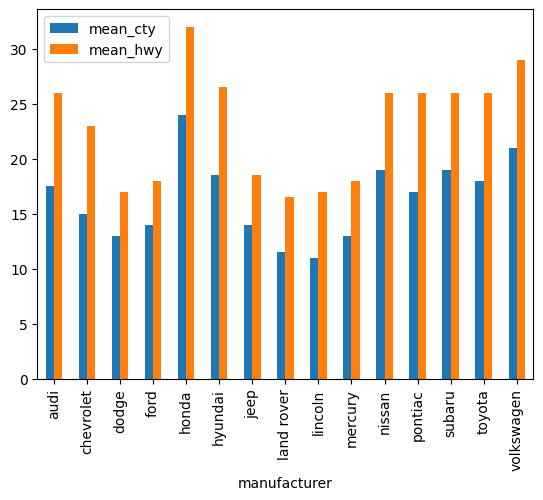

In [5]:
result.plot(kind='bar', x='manufacturer',y=['mean_cty','mean_hwy'])

- 2. hwy, cty 평균을 시각화해서 hwy순위 확인, hwy 크기로 정렬하여 다시 막대 그래프

<Axes: ylabel='manufacturer'>

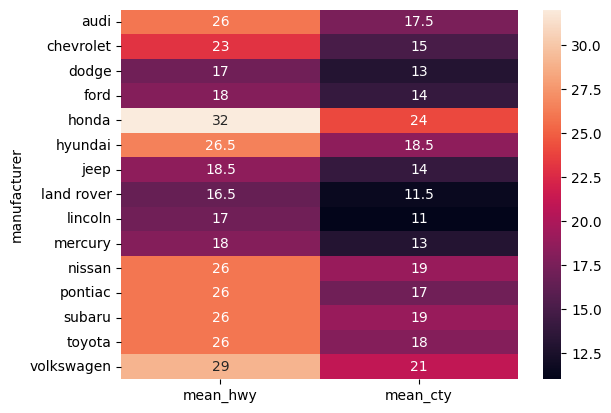

In [18]:
result = pd.merge(hwy, cty, on='manufacturer')
sns.heatmap(result, annot=True, fmt='g')

<Axes: >

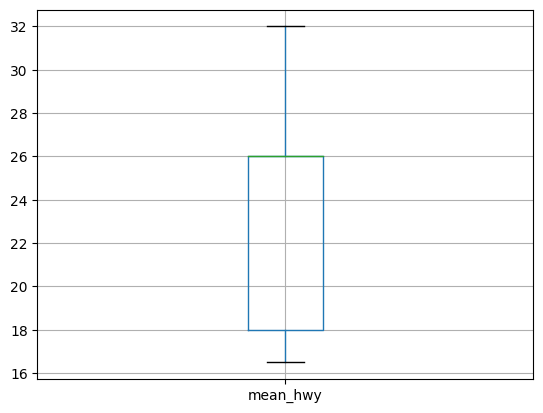

In [25]:
result.boxplot(column=['mean_hwy'])

<Axes: xlabel='manufacturer'>

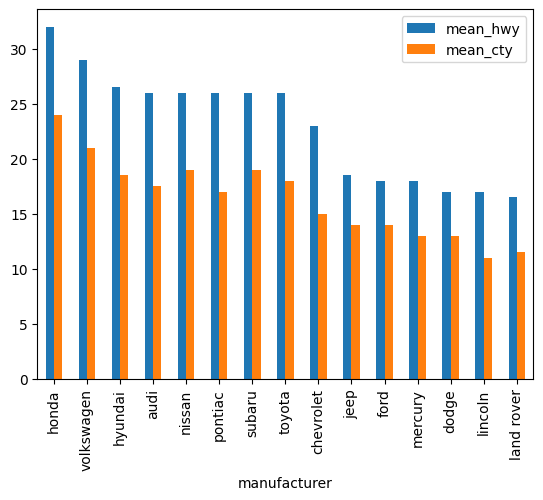

In [24]:
result_sorted = result.sort_values('mean_hwy', ascending=False)

result = result.reset_index()
result_sorted.plot(kind='bar', x= 'manufacturer', y=['mean_hwy','mean_cty'])

- 3. 타이타닉 데이터 Class별 생존률을 선 그래프로 나타내기

In [7]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


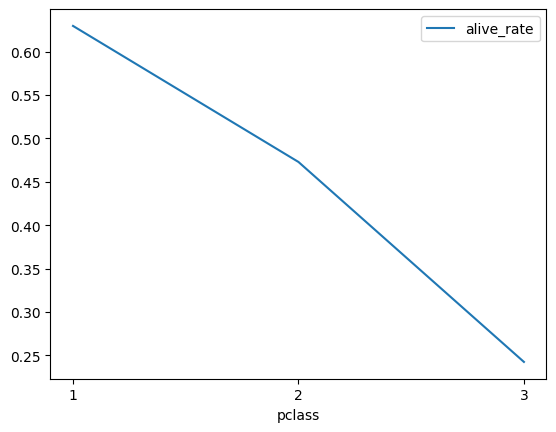

In [8]:
#데이터 pclass 그룹으로 묶어 각각 total, survived 수를 센 행을 만듦
by_nclass = titanic.groupby('pclass').agg(alive_count=('survived', 'sum'))
by_nclass['all_count'] = titanic.groupby('pclass').agg(total_count=('survived', 'size'))
by_nclass = by_nclass.reset_index()
#survived/total = rate 행 추가
by_nclass['alive_rate'] = by_nclass['alive_count'] / by_nclass['all_count']
#그래프 그리기
ax = by_nclass.plot(kind='line', x='pclass', y='alive_rate')
ax.set_xticks([1, 2, 3])
plt.show()

- 4. 목적지별 요금 최대, 최소, 평균 막대그래프

<Axes: xlabel='embark_town'>

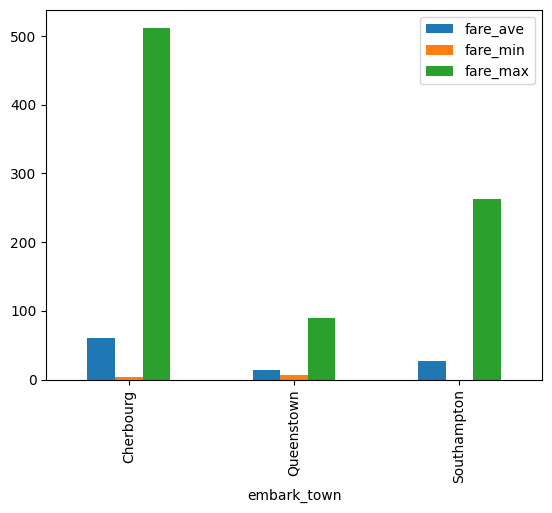

In [17]:
df1 = titanic.groupby('embark_town').agg(fare_ave=('fare', 'mean'))
df2 = titanic.groupby('embark_town').agg(fare_min=('fare', 'min'))
df3 = titanic.groupby('embark_town').agg(fare_max=('fare', 'max'))
result1 = pd.concat([df1, df2, df3], axis=1)
result1 = result1.reset_index()
result1.plot(kind='bar', x='embark_town',y=['fare_ave','fare_min','fare_max'])

### 5 fare을 구간별로 나눠서(100단위) 사람수를 막대 그래프로

In [26]:
titanic['fare'].max()

512.3292

In [27]:
titanic['fare'].mean()

32.204207968574636

([<matplotlib.axis.XTick at 0x7f3efd58c340>,
 [Text(0, 0, '500up'), Text(1, 0, '100up'), Text(2, 0, '100down')])

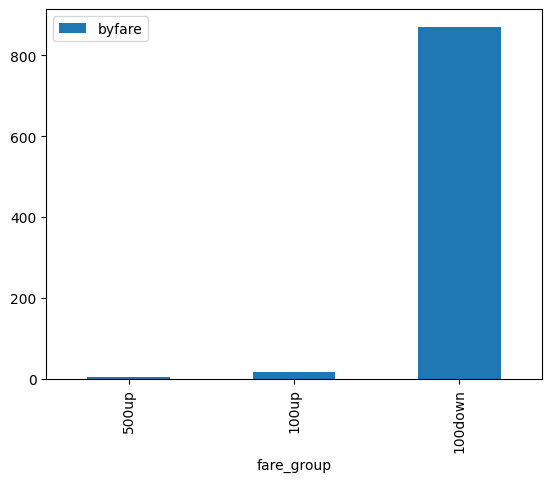

In [37]:
titanic = titanic.assign(fare_group = np.where(titanic['fare']>500,'1',
                                      np.where(titanic['fare']>400,'2',
                                      np.where(titanic['fare']>300,'3',
                                      np.where(titanic['fare']>200,'4',
                                     np.where(titanic['fare']>100,'5','5'))))))

byfare = titanic.groupby('fare_group').agg(byfare = ('survived','count'))
byfare = byfare.reset_index()
byfare.plot(kind='bar', x='fare_group',y=['byfare'])
plt.xticks(byfare.index, ['500up','100up','100down'])